We are going to use the famous iris dataset.The dataset consists of four attribute:sepal-width,sepal-length,petal-width and petal-length.These are the attributes of specific types of iris plant.The task is to predict the class to which these plants belong.These are three classes in the dataset:Iris-setosa,Iris-versicolor and Iris-virginica.

In [31]:
import numpy as np
import pandas as pd
from sklearn .model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
dataset=pd.read_csv('IRIS.csv')

In [34]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
#preprocessing the data

In [36]:
x=dataset.iloc[:,0:4]
y=dataset.iloc[:,4]

In [37]:
#Splitting the data

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [39]:
#Feature Scaling:


In [40]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)

x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [43]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [44]:
y_pred=classifier.predict(x_test)

In [45]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 9  0  0]
 [ 0 12  0]
 [ 0  0  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [46]:
error=[]

#calculating error for K values between 1 and 40
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'Mean Error')

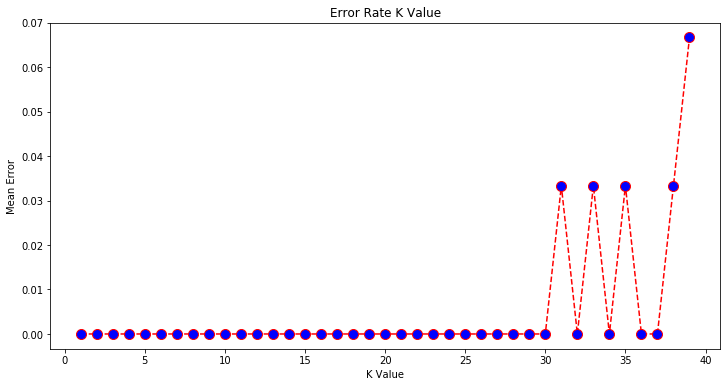

In [48]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40),error,color='red',linestyle='dashed',marker='o',
        markerfacecolor='blue',markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')